In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_path = "/content/netflix_titles data.xlsx"
df = pd.read_excel(file_path)

In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5279 non-null   object
 1   type          5279 non-null   object
 2   title         5279 non-null   object
 3   director      5279 non-null   object
 4   cast          5279 non-null   object
 5   country       5279 non-null   object
 6   date_added    5279 non-null   object
 7   release_year  5279 non-null   int64 
 8   duration      5279 non-null   object
 9   listed_in     5279 non-null   object
 10  description   5279 non-null   object
 11  Unnamed: 11   5 non-null      object
 12  Unnamed: 12   1 non-null      object
dtypes: int64(1), object(12)
memory usage: 536.3+ KB


,release_year
count,5279.000000
mean,2012.698049
std,9.656831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [5]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
duration,0
listed_in,0


In [6]:
df = df.drop(columns=['Unnamed: 11', 'Unnamed: 12'])

In [7]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'listed_in', 'description'],
      dtype='object')


In [8]:
pivot_df = df.pivot_table(index="release_year", columns="type", aggfunc="size", fill_value=0)
print(pivot_df.head(10))

type          Movie  TV Show
release_year                
1942              1        0
1944              1        0
1945              1        0
1946              1        0
1947              1        0
1954              2        0
1955              3        0
1956              2        0
1958              3        0
1959              1        0


In [9]:
pivot_country = df.pivot_table(index="country", columns="type", aggfunc="size", fill_value=0)
pivot_country = pivot_country.sort_values(by=["Movie", "TV Show"], ascending=False)
print(pivot_country.head(10))

type            Movie  TV Show
country                       
United States    1816       27
India             868        7
United Kingdom    164       19
Canada            104        3
Egypt              90        0
Nigeria            84        4
Indonesia          76        0
Spain              74        7
Turkey             74        5
Japan              73       10


In [10]:
pivot_genre = df.pivot_table(index="listed_in", columns="type", aggfunc="size", fill_value=0)
pivot_genre = pivot_genre.sort_values(by=["Movie", "TV Show"], ascending=False)
print(pivot_genre.head(10))

type                                              Movie  TV Show
listed_in                                                       
Dramas, International Movies                        333        0
Stand-Up Comedy                                     279        0
Comedies, Dramas, International Movies              253        0
Dramas, Independent Movies, International Movies    236        0
Children & Family Movies, Comedies                  179        0
Dramas, International Movies, Romantic Movies       157        0
Documentaries                                       156        0
Comedies, International Movies                      150        0
Comedies, International Movies, Romantic Movies     138        0
Dramas                                              134        0


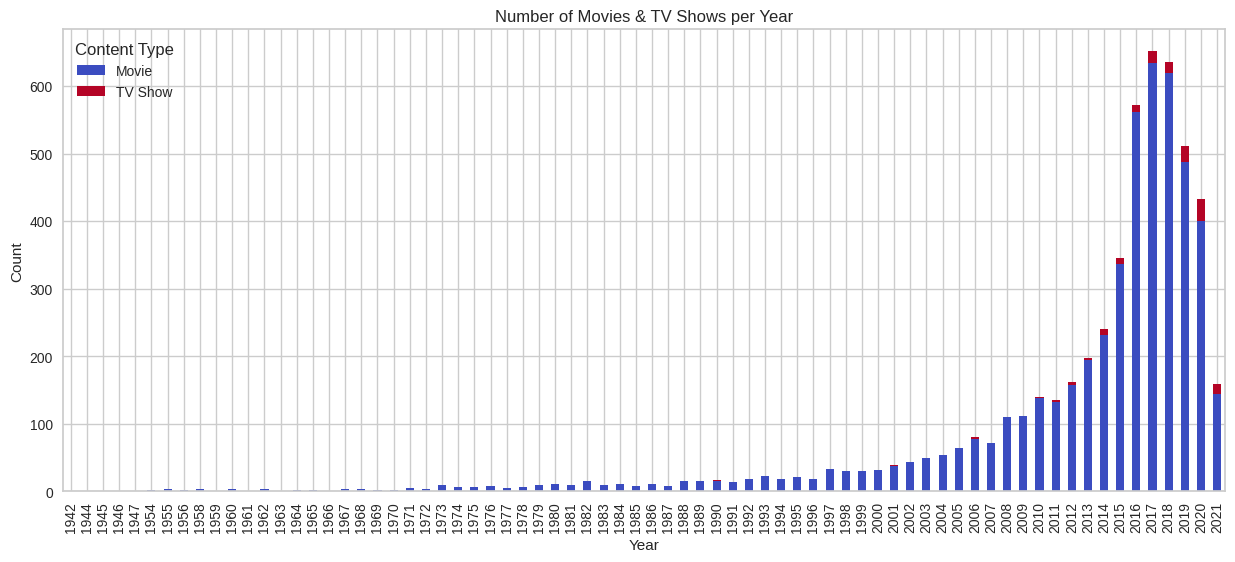

In [11]:
import matplotlib.pyplot as plt

pivot_df.plot(kind="bar", figsize=(15,6), stacked=True, colormap="coolwarm")
plt.title("Number of Movies & TV Shows per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Content Type")
plt.show()

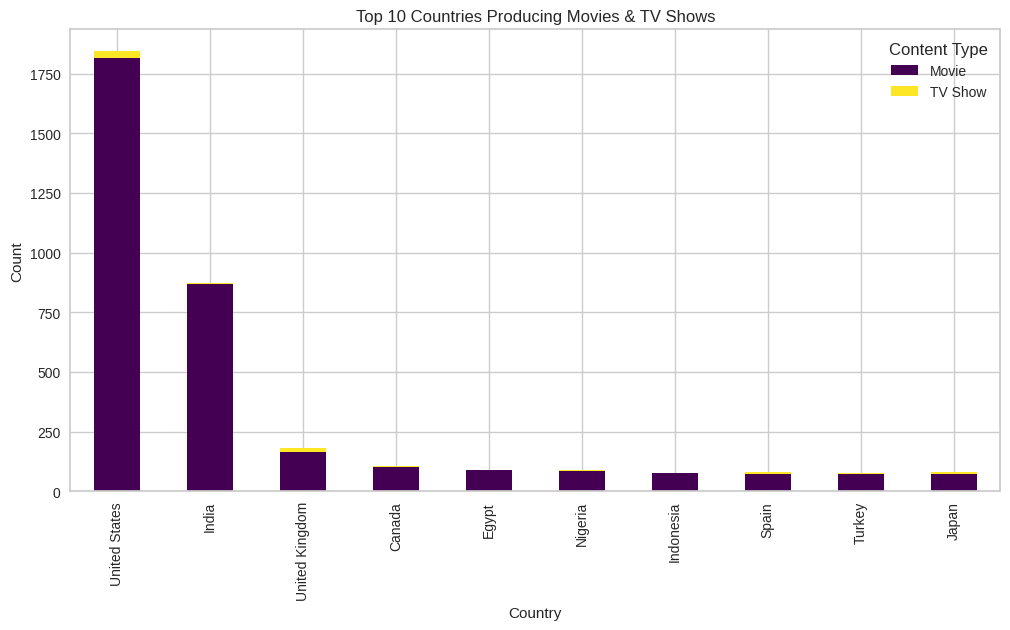

In [12]:
pivot_country.head(10).plot(kind="bar", figsize=(12,6), stacked=True, colormap="viridis")
plt.title("Top 10 Countries Producing Movies & TV Shows")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title="Content Type")
plt.show()

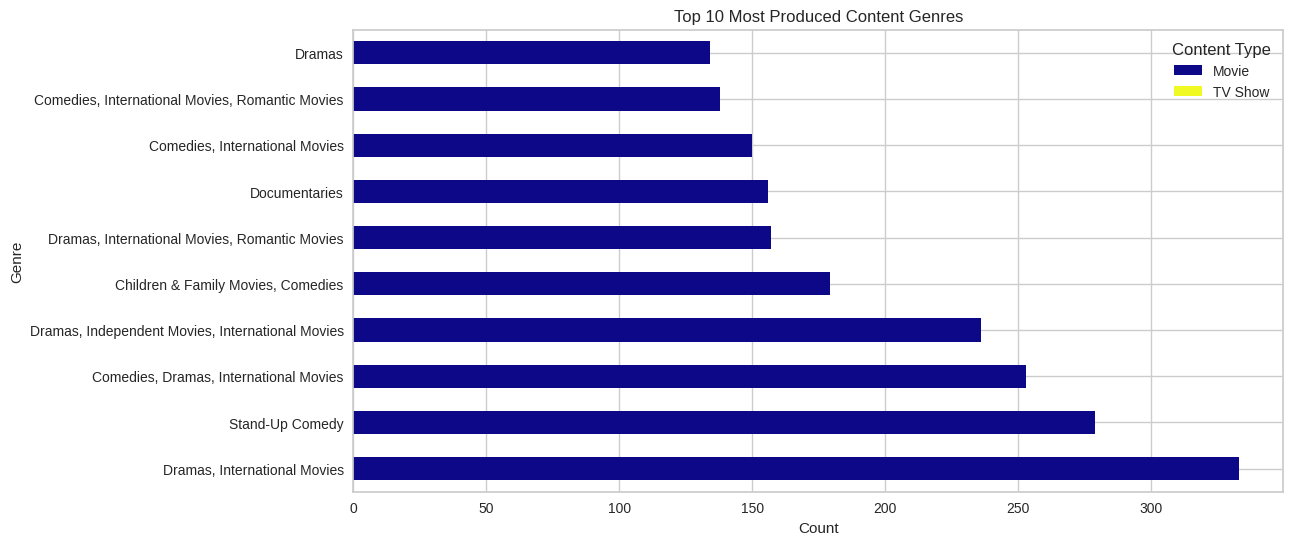

In [13]:
pivot_genre.head(10).plot(kind="barh", figsize=(12,6), stacked=True, colormap="plasma")
plt.title("Top 10 Most Produced Content Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.legend(title="Content Type")
plt.show()


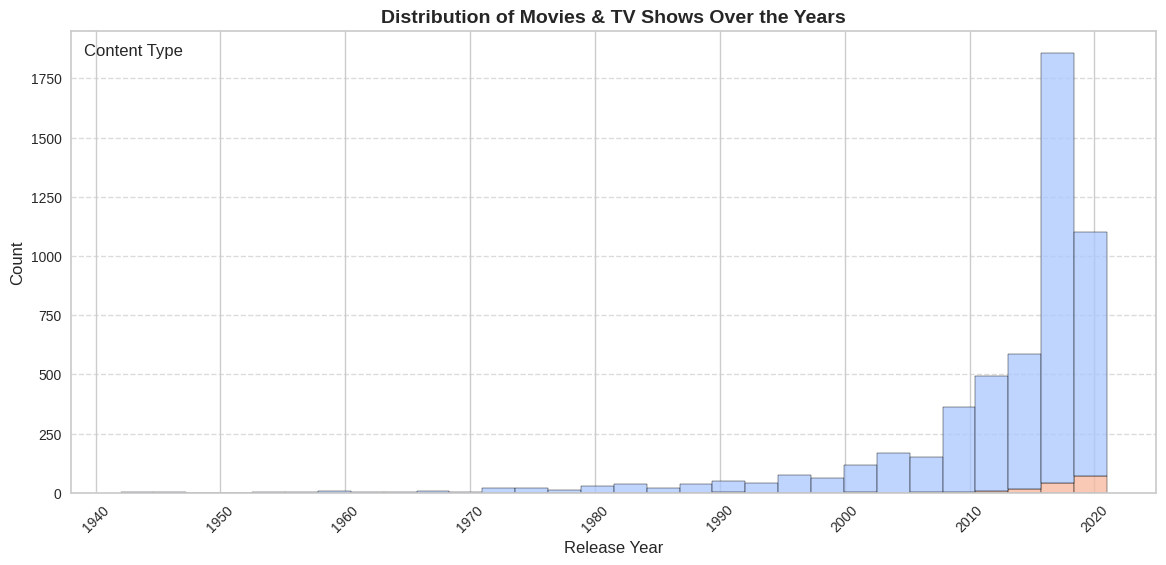

In [14]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x="release_year", hue="type", multiple="stack", bins=30, palette="coolwarm")
plt.title("Distribution of Movies & TV Shows Over the Years", fontsize=14, fontweight="bold")
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Content Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


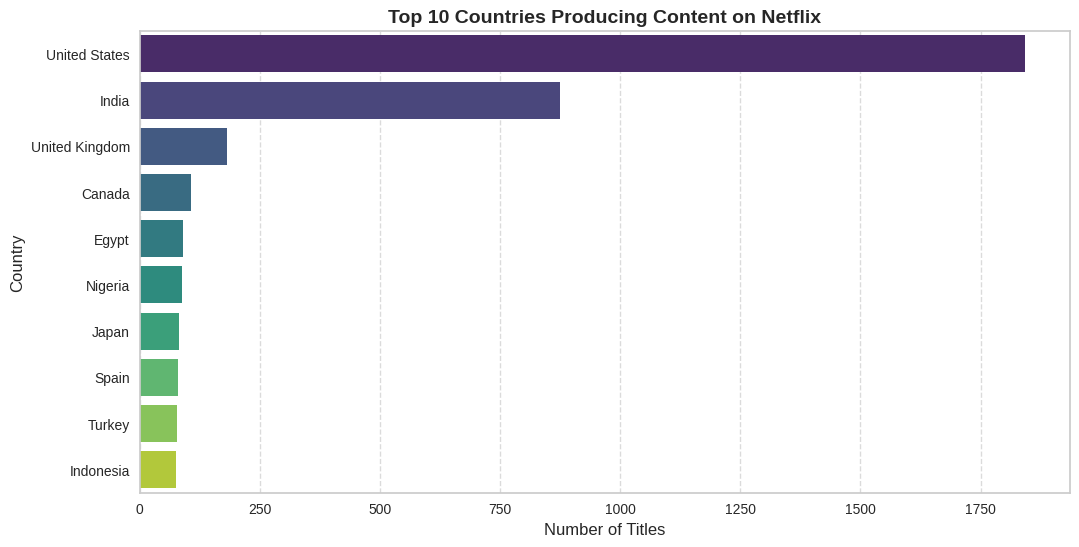

In [15]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries Producing Content on Netflix", fontsize=14, fontweight="bold")
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


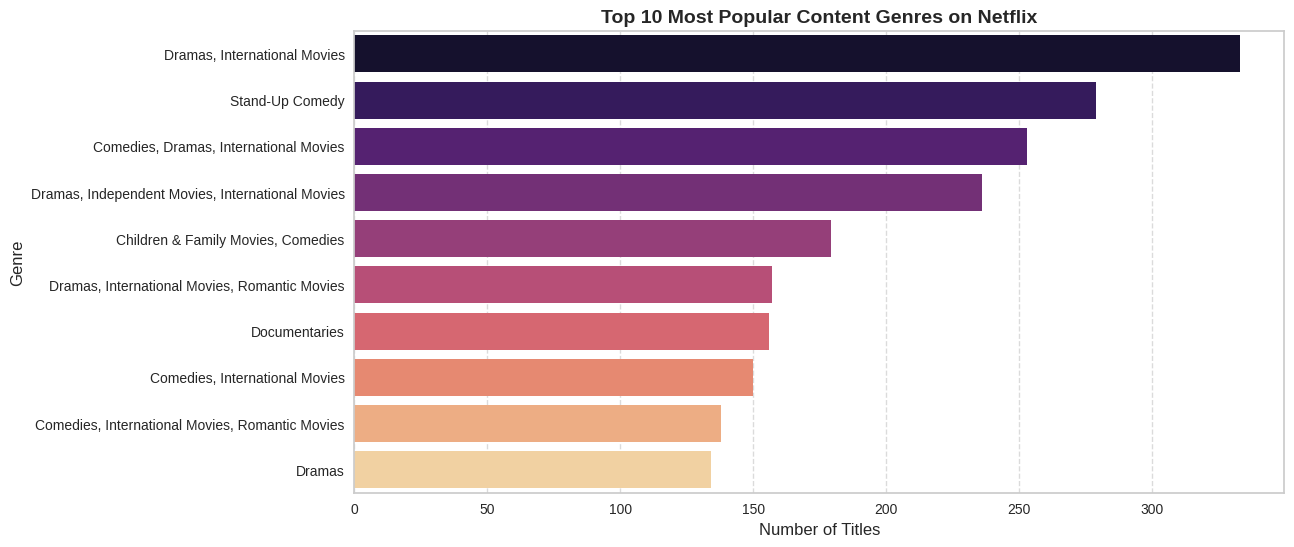

In [16]:
top_genres = df['listed_in'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette="magma")
plt.title("Top 10 Most Popular Content Genres on Netflix", fontsize=14, fontweight="bold")
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


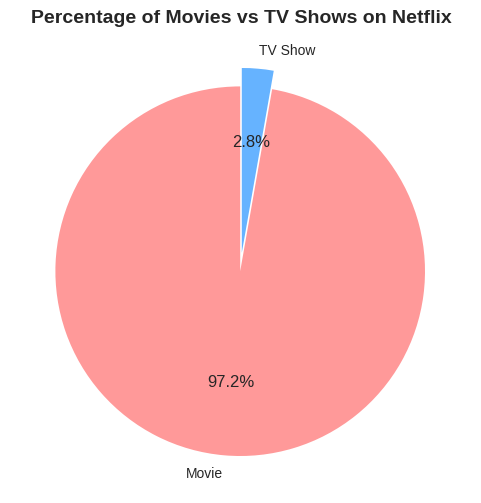

In [17]:
plt.figure(figsize=(6,6))
colors = ["#ff9999","#66b3ff"]
df["type"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=colors, explode=[0.05, 0.05])
plt.title("Percentage of Movies vs TV Shows on Netflix", fontsize=14, fontweight="bold")
plt.ylabel("")
plt.show()


In [19]:
from pycaret.classification import *
df["release_year"] = df["release_year"].astype(int)
df = df.dropna(subset=["release_year", "type"])

# إعداد بيئة التعلم الآلي
exp = setup(df, target="type", train_size=0.8, session_id=123)


,Description,Value
0,Session id,123
1,Target,type
2,Target type,Binary
3,Target mapping,"Movie: 0, TV Show: 1"
4,Original data shape,"(5279, 11)"
5,Transformed data shape,"(5279, 11)"
6,Transformed train set shape,"(4223, 11)"
7,Transformed test set shape,"(1056, 11)"
8,Numeric features,1
9,Categorical features,9


In [20]:
model = compare_models()  # تجربة أفضل نموذج تلقائيًا
best_model = create_model("rf")  # إنشاء نموذج الغابة العشوائية (Random Forest)
tuned_model = tune_model(best_model)  # ضبط وتحسين النموذج

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9931,0.9996,0.9931,0.9932,0.9926,0.8540,0.8637,1.0880
knn,K Neighbors Classifier,0.9915,0.8807,0.9915,0.9916,0.9905,0.8085,0.8259,0.5940
dt,Decision Tree Classifier,0.9910,0.8371,0.9910,0.9911,0.9901,0.7979,0.8157,0.3570
ada,Ada Boost Classifier,0.9884,0.7958,0.9884,0.9773,0.9828,0.5955,0.5956,0.3240
ridge,Ridge Classifier,0.9782,0.9992,0.9782,0.9761,0.9706,0.3172,0.4117,0.2560
svm,SVM - Linear Kernel,0.9747,0.6275,0.9747,0.9505,0.9624,0.0907,0.0911,0.4380
nb,Naive Bayes,0.9723,0.5000,0.9723,0.9454,0.9586,0.0000,0.0000,0.2830
rf,Random Forest Classifier,0.9723,0.9874,0.9723,0.9454,0.9586,0.0000,0.0000,0.4750
qda,Quadratic Discriminant Analysis,0.9723,0.6111,0.9723,0.9454,0.9586,0.0000,0.0000,0.3650
gbc,Gradient Boosting Classifier,0.9723,0.9875,0.9723,0.9454,0.9586,0.0000,0.0000,0.4030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9716,0.9583,0.9716,0.9441,0.9577,0.0000,0.0000
1,0.9716,1.0000,0.9716,0.9441,0.9577,0.0000,0.0000
2,0.9716,1.0000,0.9716,0.9441,0.9577,0.0000,0.0000
3,0.9739,1.0000,0.9739,0.9485,0.9611,0.0000,0.0000
4,0.9739,1.0000,0.9739,0.9485,0.9611,0.0000,0.0000
5,0.9739,1.0000,0.9739,0.9485,0.9611,0.0000,0.0000
6,0.9716,1.0000,0.9716,0.9439,0.9576,0.0000,0.0000
7,0.9716,0.9582,0.9716,0.9439,0.9576,0.0000,0.0000
8,0.9716,0.9579,0.9716,0.9439,0.9576,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9905,0.9583,0.9905,0.9906,0.9896,0.7954,0.8126
1,0.9953,1.0000,0.9953,0.9953,0.9951,0.9067,0.9107
2,0.9905,1.0000,0.9905,0.9906,0.9896,0.7954,0.8126
3,0.9739,1.0000,0.9739,0.9485,0.9611,0.0000,0.0000
4,0.9739,1.0000,0.9739,0.9485,0.9611,0.0000,0.0000
5,0.9739,0.9976,0.9739,0.9485,0.9611,0.0000,0.0000
6,0.9929,1.0000,0.9929,0.9929,0.9924,0.8536,0.8629
7,0.9882,0.9582,0.9882,0.9883,0.9866,0.7312,0.7591
8,0.9882,0.9583,0.9882,0.9883,0.9866,0.7312,0.7591


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
predictions = predict_model(tuned_model, data=df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9977,1.0000,0.9977,0.9977,0.9977,0.9560,0.9569


,show_id,title,director,cast,country,date_added,release_year,duration,listed_in,description,type,prediction_label,prediction_score
0,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Movie,Movie,1.0
1,s9,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,TV Show,TV Show,1.0
2,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Movie,Movie,1.0
3,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewأ¶hner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Movie,Movie,1.0
4,s25,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,Movie,Movie,1.0


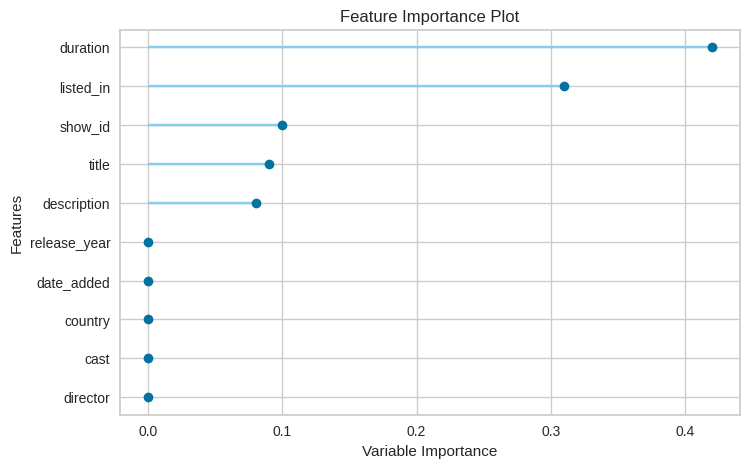

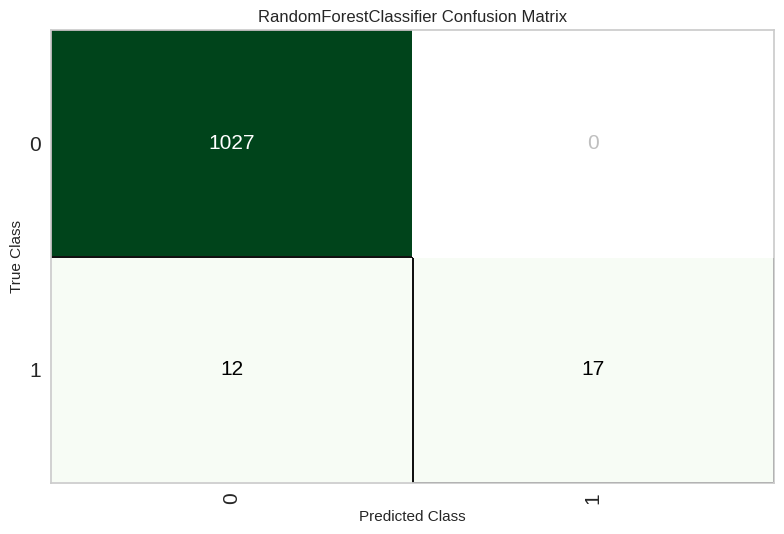

In [22]:
plot_model(tuned_model, plot="feature")
plot_model(tuned_model, plot="confusion_matrix")

In [26]:
df["release_year"] = df["release_year"].astype(int)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# تحويل الشعبية إلى تصنيف (مثلاً، إذا كان العمل حديثًا وشائعًا، يصنف كـ "Popular")
df["popularity"] = np.where(df["release_year"] >= 2015, "Popular", "Not Popular")

df["popularity"] = df["popularity"].astype("category").cat.codes

# تقسيم البيانات
X = df[["release_year"]]
y = df["popularity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب نموذج Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# التنبؤ بالنتائج
y_pred = model.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


In [33]:
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results_df.head(10))  # عرض أول 10 نتائج


      Actual  Predicted
8          1          1
1580       0          0
544        0          0
4885       1          1
3941       0          0
2312       1          1
3406       0          0
1503       1          1
167        0          0
346        0          0


In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[415   0]
 [  0 641]]


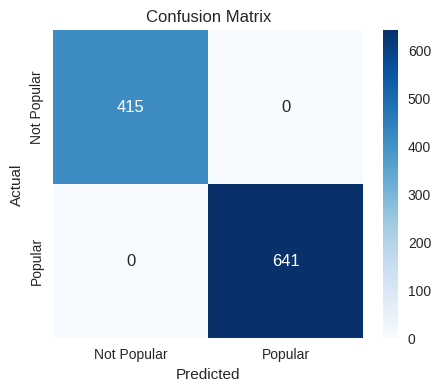

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Popular", "Popular"], yticklabels=["Not Popular", "Popular"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [36]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=["Not Popular", "Popular"])
print(report)


              precision    recall  f1-score   support

 Not Popular       1.00      1.00      1.00       415
     Popular       1.00      1.00      1.00       641

    accuracy                           1.00      1056
   macro avg       1.00      1.00      1.00      1056
weighted avg       1.00      1.00      1.00      1056



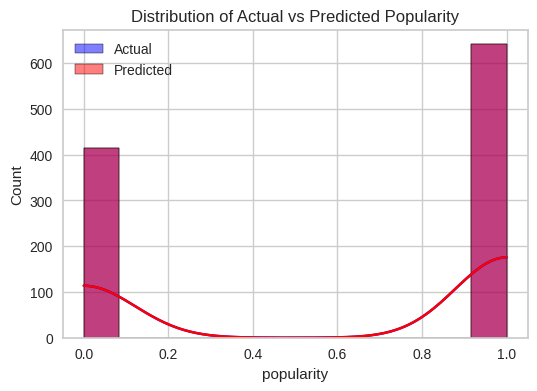

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(y_test, color="blue", label="Actual", kde=True)
sns.histplot(y_pred, color="red", label="Predicted", kde=True)
plt.legend()
plt.title("Distribution of Actual vs Predicted Popularity")
plt.show()


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# تدريب نموذج Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# تدريب نموذج Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# حساب الدقة لكل نموذج
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_pred) * 100:.2f}%")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred) * 100:.2f}%")


Random Forest Accuracy: 100.00%
Logistic Regression Accuracy: 100.00%
Gradient Boosting Accuracy: 100.00%


In [42]:
new_data = pd.DataFrame({"release_year": [2020, 2010, 2015]})  # مثال على بيانات جديدة
new_predictions = model.predict(new_data)
print(new_predictions)


[1 0 1]


In [43]:
results_df = pd.DataFrame({
    "Actual": y_test,
    "Random Forest": y_pred,
    "Logistic Regression": log_pred,
    "Gradient Boosting": gb_pred
})

print(results_df.head(10))

      Actual  Random Forest  Logistic Regression  Gradient Boosting
8          1              1                    1                  1
1580       0              0                    0                  0
544        0              0                    0                  0
4885       1              1                    1                  1
3941       0              0                    0                  0
2312       1              1                    1                  1
3406       0              0                    0                  0
1503       1              1                    1                  1
167        0              0                    0                  0
346        0              0                    0                  0


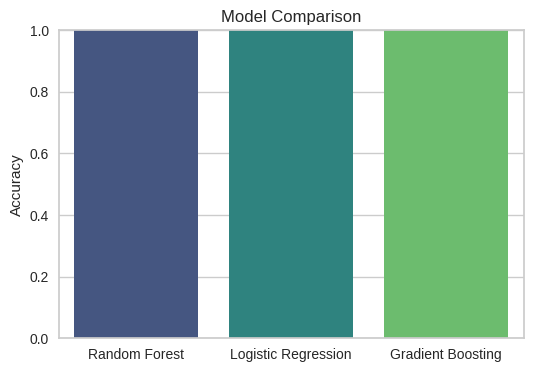

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# تجميع الدقة لكل نموذج
accuracies = {
    "Random Forest": accuracy_score(y_test, y_pred),
    "Logistic Regression": accuracy_score(y_test, log_pred),
    "Gradient Boosting": accuracy_score(y_test, gb_pred),
}

# رسم المخطط
plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.ylim(0, 1)  # تحديد النطاق من 0 إلى 100%
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


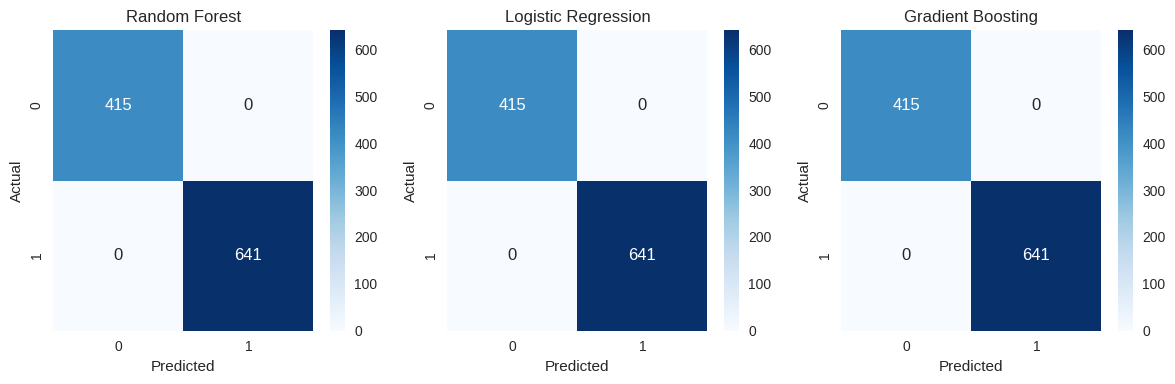

In [45]:
from sklearn.metrics import confusion_matrix

models = {
    "Random Forest": y_pred,
    "Logistic Regression": log_pred,
    "Gradient Boosting": gb_pred
}

plt.figure(figsize=(12, 4))
for i, (name, pred) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [57]:
from sklearn.metrics import classification_report

for name, pred in models.items():
    print(f"\n📌 Classification Report for {name}:\n")
    print(classification_report(y_test, pred, target_names=["Not Popular", "Popular"]))



📌 Classification Report for Random Forest:

              precision    recall  f1-score   support

 Not Popular       1.00      1.00      1.00       415
     Popular       1.00      1.00      1.00       641

    accuracy                           1.00      1056
   macro avg       1.00      1.00      1.00      1056
weighted avg       1.00      1.00      1.00      1056


📌 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

 Not Popular       1.00      1.00      1.00       415
     Popular       1.00      1.00      1.00       641

    accuracy                           1.00      1056
   macro avg       1.00      1.00      1.00      1056
weighted avg       1.00      1.00      1.00      1056


📌 Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

 Not Popular       1.00      1.00      1.00       415
     Popular       1.00      1.00      1.00       641

    accuracy                         